In [7]:
#installation
!pip install libary_name

ERROR: Could not find a version that satisfies the requirement libary_name (from versions: none)
ERROR: No matching distribution found for libary_name


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/content/Dhaka Rent - Dhaka Rent.csv')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [10]:
df.head(3)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050


In [11]:
df[25:29]

,area,rent
25,3100,53000
26,2750,48000
27,1800,25000
28,2200,31460


In [12]:
df.shape

(60, 2)

In [13]:
row,col = df.shape

In [14]:
row


60

In [15]:
col

2

In [16]:
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


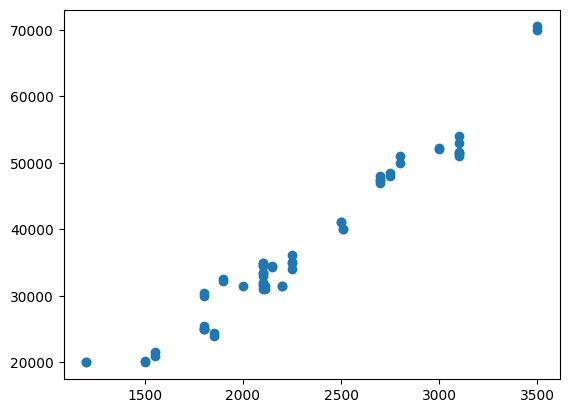

In [17]:
plt.scatter(df.area , df.rent)

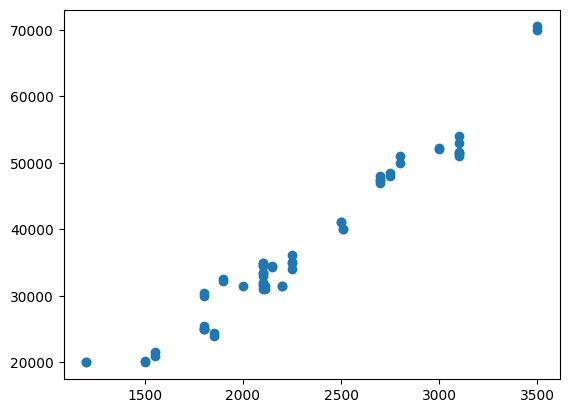

In [18]:
plt.scatter(df.area , df.rent)

Text(0.5, 1.0, 'Dhaka Rent Data ')

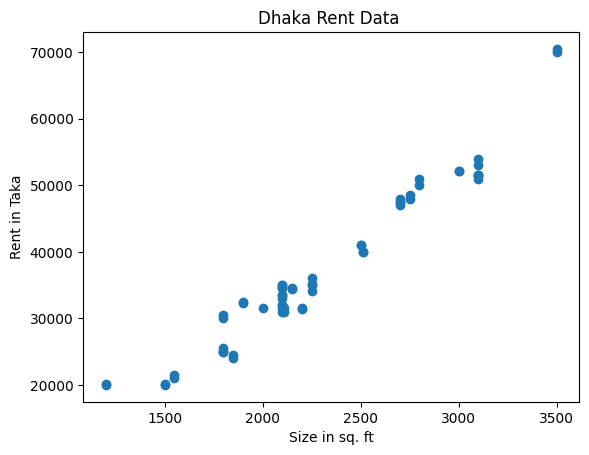

In [19]:
plt.scatter(df[['area']],df[['rent']])
plt.ylabel('Rent in Taka')
plt.xlabel('Size in sq. ft')
plt.title('Dhaka Rent Data ')

Text(0.5, 1.0, 'Dhaka Rent Data')

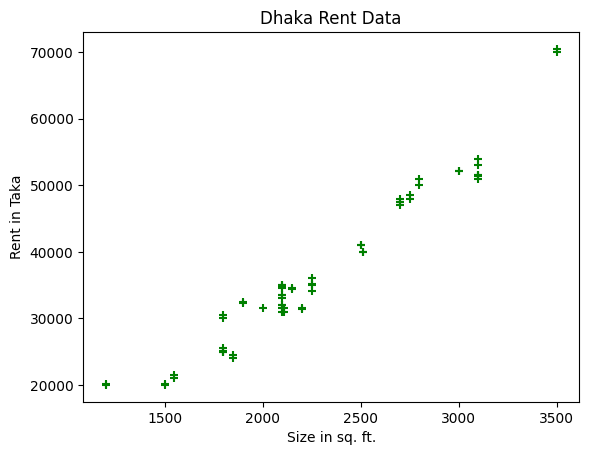

In [20]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(df[['area']] , df[['rent']], color='green', marker='+')
plt.ylabel('Rent in Taka')
plt.xlabel('Size in sq. ft.')
plt.title('Dhaka Rent Data')

In [21]:
df.area.mean()

2289.0

In [22]:
df.rent.mean()

37269.166666666664

In [23]:
x= df[['area']]
y= df[['rent']]

In [24]:
x = df.drop('rent', axis=1)

In [25]:
x.head(5)

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [26]:
y.head(4)

,rent
0,31500
1,35000
2,41050
3,36100


In [27]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [28]:
from sklearn.model_selection import train_test_split as tts

In [30]:
  xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.33, random_state=1)

In [31]:
xtrain.head()

,area
42,2100
56,2750
17,1550
31,2100
49,2700


In [32]:
ytrain.head()

,rent
42,34700
56,48500
17,21000
31,35010
49,47500


In [33]:
xtest.head()

,area
39,2100
41,2100
2,2500
48,1800
50,2110


In [34]:
ytest.head()

,rent
39,31500
41,32020
2,41050
48,25500
50,31000


Linger Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
reg=LinearRegression()

In [38]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [39]:
reg.predict([[2000]])

array([[30927.80436869]])

In [40]:
m = reg.coef_

In [41]:
c = reg.intercept_

In [42]:
c

array([-11077.74592515])

In [43]:
m

array([[21.00277515]])

In [44]:
predicted=(m*2000) + c

In [45]:
predicted

array([[30927.80436869]])

In [46]:
reg.predict(xtest)

array([[33028.08188338],
       [33028.08188338],
       [41429.19194215],
       [26727.2493393 ],
       [33238.10963485],
       [36178.49815542],
       [36178.49815542],
       [28827.52685399],
       [34078.22064072],
       [26727.2493393 ],
       [47730.02448622],
       [14125.58425115],
       [26727.2493393 ],
       [36178.49815542],
       [46679.88572888],
       [20426.41679523],
       [33028.08188338],
       [34078.22064072],
       [62431.96708907],
       [45629.74697153]])

In [47]:
df2 = df.copy()

In [48]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [49]:
df2['predicted'] = reg.predict(df[['area']])

In [50]:
df2.head()

,area,rent,predicted
0,2000,31500,30927.804369
1,2100,35000,33028.081883
2,2500,41050,41429.191942
3,2250,36100,36178.498155
4,3000,52100,51930.579516


Best fit line

Text(0.5, 1.0, 'Dhaka Rent Data')

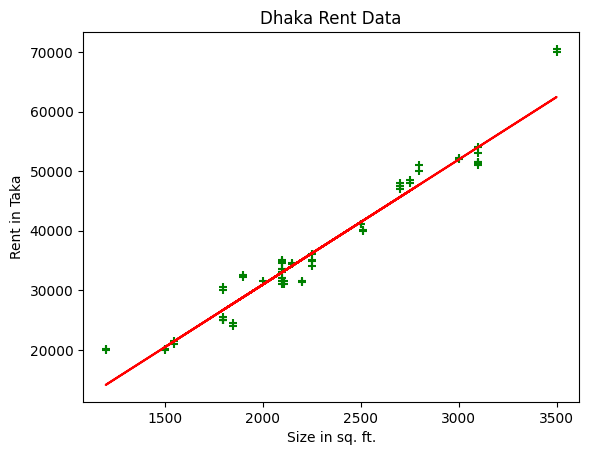

In [51]:
plt.scatter(df[['area']] , df[['rent']], color='green', marker='+')
plt.plot(xtest, reg.predict(xtest), color='red') # reg.predict(xtest) = m*xtest + c
plt.ylabel('Rent in Taka')
plt.xlabel('Size in sq. ft.')
plt.title('Dhaka Rent Data')

Text(0.5, 1.0, 'Dhaka Rent Data')

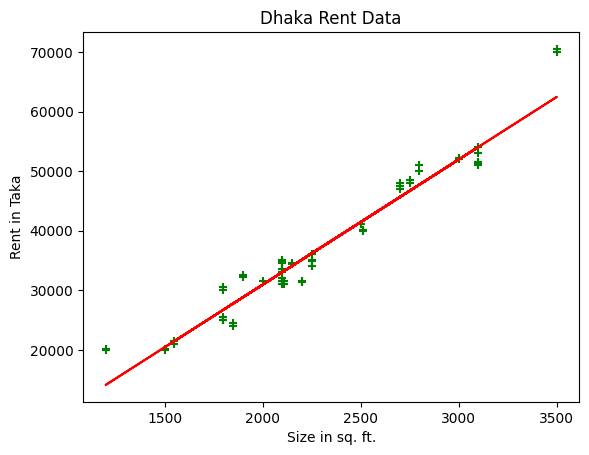

In [52]:
plt.scatter(df[['area']] , df[['rent']], color='green', marker='+')
plt.plot(xtrain, reg.predict(xtrain), color='red')
plt.ylabel('Rent in Taka')
plt.xlabel('Size in sq. ft.')
plt.title('Dhaka Rent Data')

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [54]:
#testing MSE
test_mse = mean_squared_error(ytest,reg.predict(xtest))
test_mse

7421807.705906522

In [57]:
#testing MAE
test_mse=mean_absolute_error(ytest,reg.predict(xtest))
test_mse


1881.6683699430062

In [60]:
#testing MSE
Train_mse = mean_squared_error(ytrain,reg.predict(xtrain))
Train_mse

6602823.624588491

In [63]:
#testing MAE
Train_mse=mean_absolute_error(ytrain,reg.predict(xtrain))
Train_mse

2034.6296483710926